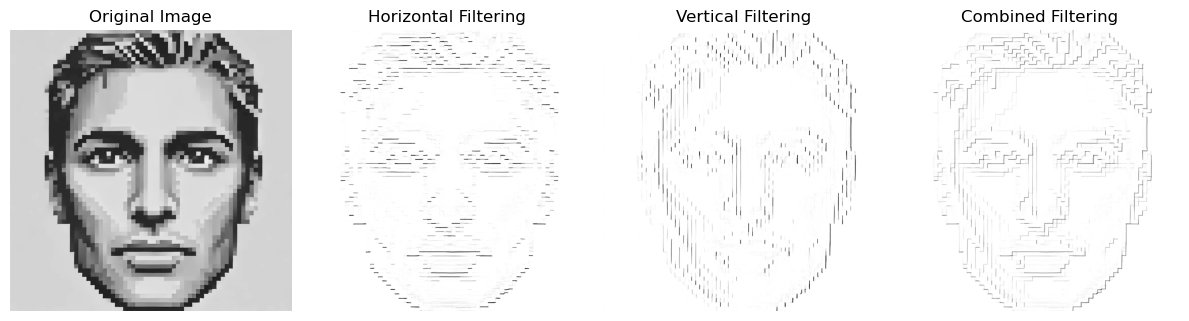

In [12]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "./male_face.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if image is None:
    print("Error: Could not load the image. Please check the file path or format.")
else:
    # Define the horizontal and vertical filters
    horizontal_filter = np.array([[-1, -1, -1],
                                  [ 0,  0,  0],
                                  [ 1,  1,  1]])

    vertical_filter = np.array([[-1,  0,  1],
                                [-1,  0,  1],
                                [-1,  0,  1]])

    # Apply the horizontal filter using convolution
    horizontal_edges = cv2.filter2D(image, -1, horizontal_filter)

    # Apply the vertical filter using convolution
    vertical_edges = cv2.filter2D(image, -1, vertical_filter)

    # Invert the filtered images
    horizontal_edges_inverted = 255 - horizontal_edges
    vertical_edges_inverted = 255 - vertical_edges
    
    # Combine the horizontal and vertical edge detection results
    combined_edges_inverted = cv2.addWeighted(horizontal_edges_inverted, 0.5, vertical_edges_inverted, 0.5, 0)
    
    # Plot the original, horizontal, vertical, and combined inverted filtered images
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 4, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 4, 2)
    plt.imshow(horizontal_edges_inverted, cmap='gray')
    plt.title('Horizontal Filtering')
    plt.axis('off')
    
    plt.subplot(1, 4, 3)
    plt.imshow(vertical_edges_inverted, cmap='gray')
    plt.title('Vertical Filtering')
    plt.axis('off')
    
    plt.subplot(1, 4, 4)
    plt.imshow(combined_edges_inverted, cmap='gray')
    plt.title('Combined Filtering')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()